# Bloom Filter Analysis for Malicious URL Detection

### By Dylan Sheehan

***

## <u>Introduction to Bloom Filters</u>

#### Algorithm Details

<p style="font-family: Monospace, Lucida Console;">A Bloom Filter is a space-efficient probabilistic data structure commonly used in applications that handle large amounts of data to determine if an element is valid or has been encountered before. They operate at a high level by addressing challenges posed by large datasets, condensing them into manageable segments to determine the existence of elements. This is achieved through the use of buckets, represented by a bit array, where hash functions ascertain if specific elements have been accessed. Primarily employed in applications requiring rapid membership queries, Bloom Filters distinguish themselves with relatively low computational complexity compared to other algorithms of similar scale. However, this efficiency comes with a trade-off: the possibility of false positives. A false positive occurs when the algorithm incorrectly identifies an element as present. Unlike traditional search algorithms that confirm definite presence, Bloom Filters prioritize quick and efficient responses, emphasizing speed over absolute accuracy. This makes them suitable for scenarios where rapid query results are crucial, albeit requiring careful consideration when false positives are accptable. </p>

<p style="font-family: Monospace, Lucida Console;">The example below illustrates the basic operation of a Bloom Filter. Although it is classified as a data structure, its algorithmic component sets it apart, particularly due to its efficient time complexity when adding elements (explained later). For instance, adding an element 'a' into a bit array (also known as a bit vector) 'v' of size 'm' bits involves using 4 hash functions 'H(a)'. These hash functions convert specific bits from 0 to 1, demonstrating the unique functionality of Bloom Filters when querying data.</p>

<center><img src="attachment:f253d5c0-56d9-4683-a026-122a096820a3.png"/></center>

<center style="font-family: Monospace, Lucida Console; font-size: 10px"><i>Source: University of Madison on Bloom Filters (see References)</i></center>

#### Why Study Bloom Filters?

<p style="font-family: Monospace, Lucida Console;">Some real applications of Bloom Filters span diverse domains, such as database queries. When a user selects specific items to query from a large database, Bloom Filters can be used to search for an item in the cache before accessing slower storage in a data center for specific information. Bloom Filters are also commonly used on username creation forums to quickly check the LRU (Least Recently Used) cache to see if common usernames have been taken. If a false positive occurs (where a user selects a valid username, but the bit array incorrectly indicates it as absent), the only consequence is that the user cannot choose that username. Bloom Filters are also employed in CDNs (Content Delivery Networks) or libraries to fetch information as quickly as possible, whether a book is available or not. They are increasingly utilized in blockchain technologies for cryptocurrencies, performing transaction filtering to verify if a transaction or block contains an element of interest from another user. As evident, Bloom Filters find application in numerous Big Data processing scenarios that require efficient mass data searches. They differ from smaller algorithms like Linear/Binary Search in their prioritization of speed over absolute accuracy, mitigating the risk of false positive results and their potential detrimental effects. Bloom Filters would be deemed unacceptable in critical contexts such as financial transactions with customers or hospitals needing accurate stock checks for emergency medicines.</p>

<p style="font-family: Monospace, Lucida Console;">Most importantly, this report will delve into a critical issue in network security, observed in applications such as Google Chrome or Firefox. Specifically, how do these browsers detect threats when users navigate to malicious URLs? Can we develop an algorithm using Bloom Filters to effectively address this common attack vector? In essence, can we use test URLs with malicious tags to identify websites that may potentially gather user data or distribute malware? In the following sections, I will develop a script to generate canonical test data of tagged malicious URLs (strings) and evaluate the reliability of a Bloom Filter in mitigating such malicious attacks, aiming to enhance user security effectively.</p>

#### Data Structures Used

<p style="font-family: Monospace, Lucida Console;">The 2 most common Data Structures in the Bloom Filter:</p>
<ol style="font-family: Monospace, Lucida Console;" type="1";>
    <li><u>The Bit Array</u> - A bit array is a data structure initialized to all zeros upon use. When specific hash functions are applied, they determine which bits in the array should be set to 1. This activation happens when the hash functions map elements to corresponding positions in the bit array, marking them as checked during queries.</li>
    <li><u>The Hash Functions</u> - Although not really a specific data astructure, the hash functions are most commonly used to determine how a particular set of data is converted to the index in the bit array. Some of these hash functions can be ranging from simple functions, to very complex functions to generate hashes for the bit array. Usually, the bigger the bit array is, the less complicated the hash function is (relieving the time complexity, but increasing space complexity), but the smaller the bit array, the more complex and uniform the hash function (possibly increasing time complexity for decreasing space complexity).</li>
</ol>

#### Algorithm Strategies

<p style="font-family: Monospace, Lucida Console;">Another thing to keep in mind is 2 strategies of the algorithm to make it perform at max potential:</p>
<ol style="font-family: Monospace, Lucida Console;" type="1";>
    <li><u>Hash Function Complexity and Bit Array Size</u> - This balance is crucial. The Hash Function selection should be effective and be very carefully picked where it should evenly distribute indexes across the bit array to make it perform without increasing the rate of False Positives. The Bit Array size is also important as it should be big enough that we can allow it to be in memory to make the Bloom Filter more accurate. In my scenario, it needs to be able to be big enough to capture the most common malicious URLs and generate enough indexes to be accurate in what it deems unsafe.</li>
    <li><u>False Positive Balance</u> - This is very important the False Positive balance needs to be established before editing the Bloom Filter for a particular situation. In detecting malicious URLs, I need to be more careful and select a False Positive balance that is more conservative to protect the user and not risk malicious intent.</li>
</ol>
    
    
<p style="font-family: Monospace, Lucida Console;">There are multiple types of Bloom Filters for different and specific problems. One of the most common Bloom Filters is the Counting Bloom Filter. Instead of hashing bits in the bit array, we can use a counting array and use integers to keep track of the number of elements hashed to that position. This gives a clearer result and a potential new algorithm to be stapled onto it to fight against potential False Positive results. There are also multiple bit arrays where we can dynamically increase these bit arrays or 'double up' in order to decrease the False Positive rate. </p>

#### Analysis Goal

<p style="font-family: Monospace, Lucida Console;">The goal of this project is to implement and evaluate the effectiveness of Bloom Filters in detecting malicious URLs within a web application environment. This way, I can generate canonical tests around the data and provide easier use for empirical analysis when measuring how insertion time, query times, and the <i>False Positive Rate</i> (FPR) of the Bloom Filter can measured to analyze the performance and optimized the <i>Probability of False Positivity, 'p'</i> to be the lowest so a user does not click on a malicious URL. </p>

***

## <u>Bloom Filter Algorithm</u>

#### Alogorithm Steps

<p style="font-family: Monospace, Lucida Console;">Our Bloom Filter can be represented by the following steps below. It's important to analyze how to reduce the False Positive Rate (FPR) of the overall function. This involves evaluating the probability and adjusting the parameters as we progress through the algorithm, aiming to decrease the rate of incorrectly identifying URLs as malicious.</p>


<ol style="font-family: Monospace, Lucida Console;" type="1">
    <li>Define the parameters of the Bloom Filter we are going to use. This is a class-style algorithm, pass in <i>n</i> and <i>p</i>:
        <ol>
            <li><i>p</i>: The Desired Probability of False Positives</li>
            <li><i>m</i>: The Size of the bit array for the Bloom Filter</li>
            <li><i>k</i>: The Number of Hash Functions to Use </li>
            <li><i>n</i>: The Expected amount of malicious URLs to be inserted into the Bloom Filter</li>
        </ol>
    </li>
    <li>Initialize the bit array to all 0's to begin with. This will for-loop through the bit-array for all of <i>n</i>.</li>
    <li>Insert the Malicious URLs <i>(See my Canonical Test Data Below for Fake Malicious URLs)</i></li>
        <ol>
            <li>Find the optimum amount of Hash Functions we need, <i>k</i>, by using a calculated formula (See Math Analysis).</li>
            <li>Insert the Malicious URL into the Hash Functions to generate a bit of 1 at positions indicated by the hash values (We are going to use the mmh3 hash function, see below).</li>
        </ol>
    <li>Query the URLs</li>
        <ol>
            <li>Check the URL is malicious by recomputing the hash values from the hash functions <i>k</i>.</li>
            <li>Loop through <i>n</i> and check if all these indicies for the hash values are set to 1 in the bit array.</li>
            <li>If all the bits are set to 1, the URL is most likely in the filter and possibly malicious.</li>
            <li>If not, and one bit is set to 0, we can comfirm with true positivity that the queried URL is not malicious.</li>
        </ol>
</ol>

<p style="font-family: Monospace, Lucida Console;">This Traditional Bloom Filter algorithm is often criticized for only standardizing the Desired Probability of the False Positives and adjusting this factor instead of the size and number of the bit array and the hash functions. You will see in the next section that is due to the fact that both <i>m</i> and <i>k</i> are directily proportional to <i>p</i> and without defining a desired value for a malicious URL, it is theoretically impossible to calculate a optimum <i>m</i> and <i>k</i> without adjusting <i>p</i> .</p>

<p style="font-family: Monospace, Lucida Console; font-size: 11px""><i><u>mmh3</u> - This is the MurMur Hashing algorithm (MurMurHash3) as it is already provided as an import in Python3. It is an easier way to calculating the hashing algorithm for our function. The time complexity is O(n) and you will see how it impacts our algorithm later. More on Murmur can be found in the references section.</i></p>

#### The Algorithm Script

In [1]:
import math
import mmh3
from bitarray import bitarray

class BloomFilter:
    """
    Bloom Filter implementation using MurmurHash3 for hashing.
    """

    def __init__(self, n, p):
        """
        Initialize the Bloom Filter.

        Parameters:
        - n (int): Number of items expected to be stored in the filter.
        - p (float): Desired false positive probability in decimal.
        """
        self.n = n # O(1)
        self.p = p # O(1)
        self.m = self.calculate_size(n, p) # O(1)
        self.k = self.calculate_hash_count(self.m, n) # O(1)
        self.bit_array = bitarray(self.m) # O(1)
        self.bit_array.setall(0) # O(1)

    def insert(self, item): # O(s * k) -> from _get_hashes, let s = size of item
        """
        Insert the items into the Bloom Filter
        """
        hashes = self._get_hashes(item) # O(s * k)
        for digest in hashes: # O(k)
            self.bit_array[digest] = True # O(1)

    
    def query(self, item): # O(s * k) -> from _get_hashes, let s = size of item
        """
        Check if an item is likely to be in the Bloom Filter.
        """
        hashes = self._get_hashes(item) # O(s * k)
        return all(self.bit_array[digest] for digest in hashes) # O(k)

    def _get_hashes(self, item): # O(s * k) - Why? -> See Theoretical Complexity Section, let s = size of item
        """
        Generate multiple hashes using MurmurHash3 and then return them.
        """
        hashes = []
        for i in range(self.k): # O(k)
            digest = mmh3.hash(item, i) % self.m # O(n)
            hashes.append(digest) # O(1)
        return hashes # O(1)

    def calculate_size(self, n, p): # O(1)
        """
        Calculate the size of the bit array (m) using the formula:
        m = -(n * log(p)) / (log(2)^2) -> Derived in Mathematical Analysis Section

        And return the size of the bit array 'm'
        """
        m = -(n * math.log(p)) / (math.log(2) ** 2) # O(1)
        return int(m) # O(1)

    def calculate_hash_count(self, m, n): # O(1)
        """
        Calculate the number of hash functions (k) to use using the formula:
        k = (m / n) * log(2) -> Derived in Mathematical Analysis Section

        And return the number of hashes which should be 'k'
        """
        k = (m / n) * math.log(2) # O(1)
        return int(k) # O(1)

<p style="font-family: Monospace, Lucida Console; font-size: 11px""><i>This algorithm is inspired from the Traditional Bloom Filter Method as it works well with the Malicious URL problem. My reference that helped build this algorithm is from GeeksForGeeks, please see the references section for more information.</i></p>

#### Canonical Test Data

<p style="font-family: Monospace, Lucida Console;">Below is created Canonical Test generator which wil; generate a random URL to be thrown through my Bloom Filter for testing. This can be even further modified, but this will do to categorize malicious vs non-malicious URLs. In a real application, you will not use this test data.</p>

In [2]:
import random
import string

def generate_random_url():
    def random_string(length): # Define a Unique End Hash (Part 2 - More Randomized) of the URL
        return ''.join(random.choices(string.ascii_letters + string.digits, k=length)) # Take Random ASCII letters and Digits and Clump them Together.
    
    def random_domain(length): # Define a Random Domain (Part 1) of the URL
        return ''.join(random.choices(string.ascii_lowercase, k=length)) # Take Random ASCII letters, no Digits, and Clump them Together.
    
    extensions = ['com', 'net', 'org', 'io', 'info'] # All the Domains I can think of to be malicious
    domain = random_domain(random.randint(5, 10)) # Take a random domain
    extension = random.choice(extensions) # Then grab one of the random extentions
    random_string_part = random_string(random.randint(5, 15)) # Create the random string after 'http://'
    
    url = f'http://{domain}-{random_string_part}.{extension}' # Create the whole URL and return.
    return url

# Print X number of URLs -> Let's test with 3
for _ in range(3):
    print("Random URL Generated: ", generate_random_url())

Random URL Generated:  http://idjpzvn-2tAbPrX6.com
Random URL Generated:  http://belpajlkk-94PPSdZkSnRCg.net
Random URL Generated:  http://bthjr-nut13bg9C.net


<p style="font-family: Monospace, Lucida Console;">Now below is a script that tests the data for querying and updating the Bloom Filter. I separated them out so it is easy to read, notice that you can define any <i>n</i> for any <i>p</i> for them to generate an outcome. Notice that the False-Positive URLs do output as expected to show that the Bloom Filter does work. But the question still remains how do we know the ideal hash function size and amount of elements in the bit-array? What determines this? <i>(See Theoretical Complexity)</i></p>

In [3]:
'''
Psuedocode for using test data to test the Bloom Filter (Code Follows):
1. Create a MALICIOUS list with n vals call generate_random_url
2. Create a SAFE list with n vals call generate_random_url
3. Shuffle together and then remove half and spit them out into an UBER list
4. Pass it into the bloom-filter.add
5. Then bloom-filter.query and check for False Positives , etc.
'''

from random import shuffle

def perform_algorithm_test(n , p):
    bloomFilter = BloomFilter(n, p)

    print("Values that are Given/Calculated:\n")
    print(f'The Ideal Number of Malicious URLs Given (n): {bloomFilter.n}')
    print(f'The False Probability Given (p): {bloomFilter.p}')
    print(f'The Number of Hash Functions (k): {bloomFilter.k}')
    print(f'The Size of Bit Array (m): {bloomFilter.m}')
    print(f'--------------------------------------------------')

    maliciousList = []
    safeList = []
    for _ in range(n):
        maliciousList.append(generate_random_url())
        safeList.append(generate_random_url())

    for mal in maliciousList:
        bloomFilter.insert(mal)
        
    shuffle(maliciousList)
    shuffle(safeList)

    UBER_LIST = maliciousList[:n//2] + safeList[:n//2]
    shuffle(UBER_LIST)

    print("URLs in Malicious List:\n")
    for val in maliciousList:
        print(f'{val}\n')
    print(f'--------------------------------------------------')

    print("URLs in Safe List:\n")
    for val in safeList:
        print(f'{val}\n')
    print(f'--------------------------------------------------')

    print("Testing URLS:\n")
    for url in UBER_LIST:
        if bloomFilter.query(url):
            if url in safeList:
                print(f'URL is a False Positive: {url}')
            else:
                print(f'URL is Most-Likely Malicious: {url}')
        else:
            print(f'URL is Not Malicious: {url}')


# Run through an Example, n=20, p=0.1
n = 20
p = 0.1
perform_algorithm_test(n, p)

Values that are Given/Calculated:

The Ideal Number of Malicious URLs Given (n): 20
The False Probability Given (p): 0.1
The Number of Hash Functions (k): 3
The Size of Bit Array (m): 95
--------------------------------------------------
URLs in Malicious List:

http://winnstmtg-1yEKhRQ.com

http://uhgnf-qiE41hNyfciPY.org

http://ynsyqgitt-0uF4WTb.com

http://vusuqn-D3djS.info

http://mgjwkqbn-Ibd5c6TTSjR.org

http://ivzzd-HmJyxOcwK91.org

http://rlizqnx-661gLxyp2ON.com

http://ujpaktw-RwYtrNnAang7zBn.info

http://heexazvybd-INFK787eDjpKjE.info

http://xytklaq-Fky3FLnbDNxB7.org

http://jhcrwmc-P1Dm8hiCB9ea.net

http://luqyx-drkH6oYHcC9lMI.info

http://hkunlty-D0buieQCCq.org

http://ddcvl-6R0NrwHRigHfhh.io

http://tbcnk-XQkccr9gCX7IZ.org

http://hkogjzcbn-9EjG1t32a.info

http://vfjugoqmun-4ptmH5.info

http://zqsrxspmg-Yff79Z.io

http://lhsvxjft-GZyJuG.info

http://udyhc-azBw4P2.io

--------------------------------------------------
URLs in Safe List:

http://jsmcykyv-ay9fi1Vv.net

http:

***

## <u>Theoretical Analysis</u>

#### Mathematical Analysis

<p style="font-family: Monospace, Lucida Console;">In the Algorithm we measured the optimal <i>k</i> and <i>m</i> for defining the functions for the hash function (<i>calculate_hash_count</i> method) and the bit array (<i>calculate_size</i> method) respectively. But how do we derive this and understand that this is the optimum for <i>k</i> and <i>m</i> and how can we apply this in the empirical analysis to find the right balance without taking too much time and space?</p>

<p style="font-family: Monospace, Lucida Console;">Let's delve into the probability 'p', which indicates the likelihood of a False Positive (mistakenly identifying a URL as present). In our algorithm design, we adjust parameters 'k' and 'm' to fine-tune this probability. Our aim is to minimize the False Positive Rate (FPR) for 'n' elements, ensuring users aren't misled by false URLs. By configuring 'k' and 'm', we control 'p' effectively, striking a balance between accuracy and computational efficiency.</p>

<p style="font-family: Monospace, Lucida Console;">Lets say we have a Bloom Filter with <i>k</i> hash functions and <i>m</i> bits, the probability (P) of a bit being 0 after an insertion would be:</p>

$$P = (1-1/m)^k$$

<p style="font-family: Monospace, Lucida Console;">Recall, this will iterate a total of 'k' times for '1/m' bits as we subtract 100% of the bit array for those that do not turn 0. That means after 'n' insertions, the probability of it still being 0 is:</p>

$$P = (1-1/m)^{nk}$$

<p style="font-family: Monospace, Lucida Console;">We multiply <i>n</i> by <i>k</i> because we will perform this operation for 'n' times. Now, a probability of a False Positive is commonly known from Statistics as:</p>

$$P' = (1-P)^k$$

<p style="font-family: Monospace, Lucida Console;">Where 'P' is the probability after 'n' events occur. So we can plug our 'P' into the equation and we get the final probability of False Positive to be: </p>

$$(1-(1-1/m)^{nk})^k$$

<p style="font-family: Monospace, Lucida Console;">However, we are looking for the probability that there were <i>k</i> different bits that were changed to 1. In that case that can be simplified to:</p>

$$\cong\boxed{(1-e^{-kn/m})^k}$$

<p style="font-family: Monospace, Lucida Console;">Now based on this equation, we can analyze the variables by keeping everything else constant: </p>
<ol style="font-family: Monospace, Lucida Console;">
    <li><u>Increasing k</u> - Reduces FPR (False Positive Rate) since we allowing bits to spread across the bit array.</li>
    <li><u>Increasing n</u> - Doesn't affect the FPR, but generally increasing the amount of elements can cause more bit collisions.</li>
    <li><u>Increasing m</u> - Increasing this tends to decrease the FPR (False Positive Rate) since we are allowing more space.</li>
</ol>

<p style="font-family: Monospace, Lucida Console;">To find the optimum <i>k</i> hash functions, we can perform a calculation by using the <u>approximated</u> probability equation. Approximation is very important here, we need to evaluate the best 'k' to fully minimize the FPR. Lets analyze. Think in terms of malicious URL's, we want to pick a specific <i>k</i> that is low enough for time complexity of insertion and querying, but also a low enough FPR. So how is this done? According to Dr. Simon S. Lamb from the University of Texas at Austin, he said that we can graph our determined probability which is $(1-(1-1/m)^{nk})^k$ for any given 'm/n' as an <u>approximate</u> value for 'k' hash functions since it will show the best ratio of 'm' and 'n' to determine 'k' that equates to value 8. But why 8? Lets see it graphed, and assume 'm/n' is 8:</p>

<center><img src="attachment:ca06814b-23c8-4dd4-a631-9fbb1c4a0eea.png" width="400"  height=4500"/></center>

<center style="font-family: Monospace, Lucida Console; font-size: 10px"><i>Source: University of Texas by Dr. Lamb (see References)</i></center>

<p style="font-family: Monospace, Lucida Console;">This shows that if choose a very low FPR, and graph it vs <i>k</i>, we can see 5.45 hash functions (k) is the optimal value to reduce time and space complexity of insertion and query. We chose the bottom of the curvature for a low FPR while still trying to maintain a relatively low 'k'. Now we have this information, let derive 'k': </p>

<li style="font-family: Monospace, Lucida Console;">We know that from the graph the average number of false positives among <i>k</i> hash functions is the following:</li>

$$f(k)≈(1-e^{-kn/m})^k$$

<li style="font-family: Monospace, Lucida Console;">Now we take the logarithm of this, which will end up to be (approx):</li>

$$log(f(k))≈k*log(1-e^{-kn/m})$$

<li style="font-family: Monospace, Lucida Console;">Then we take the derivative of the approx, which to save time (I will plug into Wolfram Alpha) turns out to be something like this:</li>

$$log(1-e^{-kn/m})+k\frac{\frac{n}{m}e^{-kn/m}}{1-e^{-kn/m}}=log(1-e^{-kn/m})+\frac{kn}{m}*\frac{e^{-kn/m}}{1-e^{-kn/m}}$$

<li style="font-family: Monospace, Lucida Console;">Now we let $x=e^{-kn/m}$ and approximate between (0,1). Lets plug 'x' in and take the derivative:</li>

$$\frac{(1-x)*log(1-x)-x*log(x)}{1-x}$$

<li style="font-family: Monospace, Lucida Console;">Then at 'x', we can see it is 0 at $x=1/2$, and its positive above and negative below this value. So then when $k<\frac{m}{n}*ln2$ we can see the approx to $f(k)$ is decreasing, and when 'k' is <i>greater than</i> this arbitrary function, it is increasing. Thus we can conclude that 'k' or the optimum approx hash functions is:</li>

$$\boxed{k=\frac{m}{n}*ln2}$$

<p style="font-family: Monospace, Lucida Console;">We can then find parameter 'm' for this best optimum 'k'. The best way to determine this is not by approximation because we already found that with 'k'. Instead, we plug this back into our original probability of false positivity which was $(1-(1-1/m)^{nk})^k$. In our malicious URL problem, we need to have perfect balance between the size of the bit array and the probability of False Positives occuring.</p>
    
<p style="font-family: Monospace, Lucida Console;">If we assume this (as this is our goal of expirmentation), then we can solve for 'm' by substituting 'k' and get:

$$\boxed{m = -\frac{nlnP}{(ln2)^2}}$$

<p style="font-family: Monospace, Lucida Console;">Which is our optimum 'm' defined in our Bloom Filter Algorithm. Now that we found 'k' and 'm' parameters for best optimibility, we need to test it in the empirical analysis to see if this is really true with a bunch of variations of 'p'.</p>

<p style="font-family: Monospace, Lucida Console; font-size: 12px"><i><u>Later in the Empirical Analysis</u></i> - Find the FPR by calculating how often the filter incorrectly identifies a regular URL as malicious and store in <i>control</i> variable. The FPR is ran at the end of each input <i>n</i> as it needs to see which URLs are 'good' out of the total malicious URLs fed to the Bloom Filter.</p>

<p style="font-family: Monospace, Lucida Console; font-size: 12px"><i><u>See the References</u> - For sources I used to reach these optimum derviations for 'm' and 'k' to analyze how exciting and triggering 'p' can effect these parameters and provide for unique empirical analysis when we find the best values for space and time complexity by timing the algorithm. I did this by using the University of Texas notes on Traditional Bloom Filters and Wolfram Alpha to perform the calculation to reach these best optimum values. </p>

#### Insertion Time Complexity

<p style="font-family: Monospace, Lucida Console;">The Insertion Time Complexity is quite simple to calculate for the Traditional Bloom Filter. If we go back to our original algorithm, I left small comments to determine the overall complexity. Even if we didn't use the algorithm through code, we can think it through:</p>

<li style="font-family: Monospace, Lucida Console;">Set up the Bloom Filter, and insert a Malicious URL. This will make the URL run <i>k</i> times.</li>
<li style="font-family: Monospace, Lucida Console;">It then runs through the MurMur3 Hash Functions which computates <i>s</i> times for 's' input bits.</li>
<li style="font-family: Monospace, Lucida Console;">Then we set bits which just takes constant time.</li>

<p></p>

<p style="font-family: Monospace, Lucida Console;"><b><u>Worst Case (Varying 's'):</u></b> $O(s*k)$, due to <i>k</i> hash functions of <i>s</i> bit iterations of hashing.</p>
<p style="font-family: Monospace, Lucida Console;"><b><u>Average Case (Varying 's'):</u></b> $O(s*k)$, same as Worst Case, it is independent of <i>n</i>.</p>

<p style="font-family: Monospace, Lucida Console;">One thing to notice, is that in our Canonical test, we made <i>s</i> to be fixed. The Largest size of the item is $O(38)$ (constant) which is the max possible size of the URL. This is because since we fixed the max, we can disregard the <i>s</i> element. So the time complexity for the Malicious URL application is:  </p>

<p style="font-family: Monospace, Lucida Console;"><b><u>Worst Case:</u></b> $\boxed{O(k)}$, due to <i>k</i> hash functions of constant hashing functions.</p>
<p style="font-family: Monospace, Lucida Console;"><b><u>Average Case:</u></b> $\boxed{O(k)}$, same as Worst Case, it is independent of <i>n</i>.</p>

#### Query Time Complexity

<p style="font-family: Monospace, Lucida Console;">The Query Time Complexity is the same as the Insertion Time. The loop runs 'k' times for the number of hash functions being searched in the bit array and the MurMur3 Hashing will run for the size of the URLs being hashed to find these bits and check if they are 1 or 0. So we can generalize:</p>

<p style="font-family: Monospace, Lucida Console;"><b><u>Worst Case (Varying 's'):</u></b> $O(s*k)$, due to <i>k</i> hash functions of <i>s</i> bit iterations of hashing.</p>
<p style="font-family: Monospace, Lucida Console;"><b><u>Average Case (Varying 's'):</u></b> $O(s*k)$, same as Worst Case, it is independent of <i>n</i>.</p>

<p style="font-family: Monospace, Lucida Console;">And of course, since our 's' is constant with $O(1)$:</p>

<p style="font-family: Monospace, Lucida Console;"><b><u>Worst Case:</u></b> $\boxed{O(k)}$, due to <i>k</i> hash functions of constant hashing functions.</p>
<p style="font-family: Monospace, Lucida Console;"><b><u>Average Case:</u></b> $\boxed{O(k)}$, same as Worst Case, it is independent of <i>n</i>.</p>

#### Space Complexity

<p style="font-family: Monospace, Lucida Console;">The only thing that can grow or shrink is the bit array itself which is <i>m</i> and this is what we need to also take in account when optimizing the FBR with 'k'. This means that the Space Complexity is:</p>

<p style="font-family: Monospace, Lucida Console;"><b><u>Space Complexity:</u></b> $\boxed{O(m)}$, due to <i>m</i> sized bit array which takes memory.</p>

***

## <u>Empirical Analysis</u>

<p style="font-family: Monospace, Lucida Console;">The Empirical Analysis begins by determining the optimization equations for our chosen $n$ (number of elements) and $p$ (desired false positive probability) values. We then calculate the optimal $m$ (size of the bit array) and $k$ (number of hash functions) values. The goal is to test and verify if these calculated values produce a false positive rate (FPR) that matches our chosen $p$. By experimenting with various $p$ values such as 0.1, 0.05, and 0.01, across a wide range of $n$ values, we can graph the results and observe if the actual FPR aligns with the expected $p$, confirming the accuracy of our theoretical predictions. See the following steps below to understand how this analysis is conducted.</p>

<ol style="font-family: Monospace, Lucida Console;">
    <li>First we use my Bloom Filter alogorithm I have defined for our base measurement of expirimentation. We use the Fake URL generator which will give us varying lengths of URLs (strings) that can be used for calculating the FPR.</li>
    <li>Recall that the FPR (False Positive Rate) is calculated by $FPR=\frac{h}{i}$ were $h$ is the number of False Positives and $i$ is of course, the number of queries. Here, $i$ is usually split, we can perform 4000 queries total which is $i$ and 2000 of them could be inserted in the Bloom Filter and the other 2000 is not. In my code, we need to trigger False Positives, so we will generate like my example, half safe URLs and half malicious URLs.</li>
    <li>My test function (perform_algorithm_test) can be modified to calculate the false positive rate (FPR) after each run of the Bloom Filter. In this modified test, we focus solely on false positives. To do this, we insert the entire $maliciousList$ into the Bloom Filter, and then query all URLs from the $safeList$ to identify any false positives. It is important to keep track of the number of queries to accurately calculate the FPR. This approach allows us to test various values of $n$ (e.g., 1000, 5000, and 10000) to simulate real-world scenarios.</li>
    <li>This test will run 3 times for the 3 varying values of chosen $n$ and 3 varying values of chosen $p$ for a total of 9 different tests.</li>
    <li>Then we can determine and see if the final FPR value will equal our $p$ value <i>(or hopefully come close to)</i> to see if the thoery of optimibility calculated in my Theoretical Analysis can be used for optimization of Bloom Filters for this problem.</li>
</ol>

<p style="font-family: Monospace, Lucida Console;"> See the Experiment (Code) Below:</p>

Run 1: p: 0.01, n: 1000, m: 9585, k: 6, FPR: 0.0110
Run 2: p: 0.05, n: 1000, m: 6235, k: 4, FPR: 0.0480
Run 3: p: 0.1, n: 1000, m: 4792, k: 3, FPR: 0.1070
Run 4: p: 0.01, n: 5000, m: 47925, k: 6, FPR: 0.0094
Run 5: p: 0.05, n: 5000, m: 31176, k: 4, FPR: 0.0562
Run 6: p: 0.1, n: 5000, m: 23962, k: 3, FPR: 0.1006
Run 7: p: 0.01, n: 10000, m: 95850, k: 6, FPR: 0.0087
Run 8: p: 0.05, n: 10000, m: 62352, k: 4, FPR: 0.0509
Run 9: p: 0.1, n: 10000, m: 47925, k: 3, FPR: 0.1013


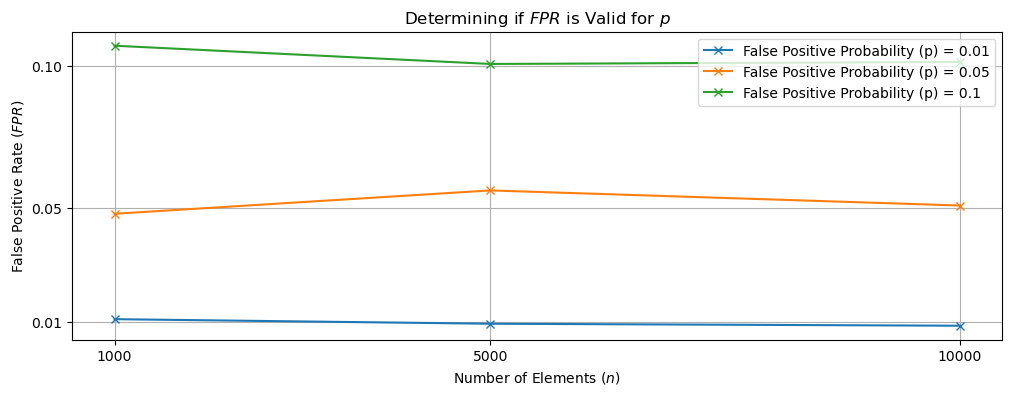

In [4]:
import math
import mmh3
from bitarray import bitarray
from random import shuffle
import matplotlib.pyplot as plt # Using matplotlib (and documentation) for portraying results.

# Modified Algorithm to Return the Number of False Positives and the Total Queries.
def perform_algorithm_test_modified(n, p):
    bloomFilter = BloomFilter(n, p)
    countFP = 0
    totalQueries = 0

    maliciousList = [generate_random_url() for _ in range(n)] # Generate MalList.
    safeList = [generate_random_url() for _ in range(n)] # Generate SafeList.

    for mal in maliciousList:
        bloomFilter.insert(mal) # This is key here, we only want malicious URLs.

    # We Shuffle Each and Remove UBERLIST (not needed for expirimentation).
    shuffle(maliciousList)
    shuffle(safeList)

    for url in safeList: # Loop through SafeList.
        totalQueries += 1 # We count the queries.
        if bloomFilter.query(url): # Then we try to Trigger False Positives.
            countFP += 1 # We add it if we got them.

    return countFP, totalQueries # Then we can return each.

# This calculates our FPR and returns it, remember # of false positives over total queries.
def calculate_false_positive_rate(false_positives, total_queries):
    return (false_positives / total_queries)

# These are the Parameters for the Bloom Filter
expected_elements = [1000, 5000, 10000]  # These are the values for 'n'.
false_positive_probs = [0.01, 0.05, 0.1]  # These are our probs we decided to use.

'''
This will store the results as a dictionary.
    The key is the False Positive Prob. (p).
    The value is a list of the calculates FPR 3 times per each p vs n.
'''
dictionaryPlot = {p: [] for p in false_positive_probs}

# Run The Analysis
run = 1 # Holds the Number of Runs, remember this should be 9 (|p| * |n|).
for n in expected_elements: # Loop through n.
    for p in false_positive_probs: # And target p.
        
        # Call our test and see how many false positives and total queries we have (half of n).
        false_positives, total_queries = perform_algorithm_test_modified(n, p)

        # Gather the bloom variables of 'm' and 'k'.
        bloomGather = BloomFilter(n,p) 

        # Calculate the FPR by calling our new function that divides them.
        FPR = calculate_false_positive_rate(false_positives, total_queries)

        # Then we Print it out and append the FPRs to our dictionary and increase the run counter.
        print(f"Run {run}: p: {p}, n: {n}, m: {bloomGather.m}, k: {bloomGather.k}, FPR: {FPR:.4f}")
        dictionaryPlot[p].append(FPR)
        run = run + 1

# Plot Results -> Had Help from matplotlib documentation.
plt.figure(figsize=(12, 4))

# Plot each of the 3 lines
for p in false_positive_probs:
    plt.plot(expected_elements, dictionaryPlot[p], marker='x', label=f'False Positive Probability (p) = {p}')

plt.xlabel('Number of Elements ($n$)')
plt.ylabel('False Positive Rate ($FPR$)')
my_xticks = [1000, 5000, 10000] # Values we had for 'n'.
my_yticks = [0.01, 0.05, 0.1] # Values we had for 'p'.
plt.xticks(my_xticks)
plt.yticks(my_yticks)
plt.title('Determining if $FPR$ is Valid for $p$')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

### Empirical Validation Supporting Mathematical Analysis

<p style="font-family: Monospace, Lucida Console;">Notice that my Mathematical Analysis in my Theoretical Analysis does in fact coorelate to our empirical results. We can validate the following:

<ol style="font-family: Monospace, Lucida Console;">
    <li>Our empirical analysis has confirmed the validity of our mathematical theoretical predictions regarding the Bloom Filter’s performance. We observed that the experimentally measured False Positive Rate (FPR) closely aligns with the theoretical false positive probability (p) we calculated. This alignment demonstrates that our mathematical models for determining the optimal size of the bit array (m) and the number of hash functions (k) are accurate. By using these theoretical equations for $m$, $p$, and $k$ (see above), we effectively optimized our parameters to achieve the expected FPR. This empirical validation reinforces the reliability of our theoretical approach and confirms that our Bloom Filter configuration is both practical and effective.</li>
    <li>Our analysis demonstrates that decreasing the false positive probability $p$ results in an increase in the number of hash functions $k$ and a decrease in the size of the bit array $m$. This relationship confirms that $k$ and $m$ are inversely proportional to $p$. Specifically, as $p$ decreases, the Bloom Filter adjusts by increasing $k$ to enhance detection accuracy, while $m$ decreases accordingly. This adjustment impacts both time and space complexity, as shown in the <i>Empirical Complexity</i> section below. Consequently, while a lower $p$ improves the accuracy of detecting malicious URLs, it introduces trade-offs in computational time and memory usage (also detailed in the <i>Empirical Complexity</i> section below).</li>
</ol>

### Empirical Complexity

<p style="font-family: Monospace, Lucida Console;">Having validated our Mathematical Analysis, we now aim to demonstrate its practical implications through an examination of Insertion and Query Time Complexity. Unlike deterministic algorithms, Bloom Filters are probabilistic in nature, and their performance does not scale directly with the number of elements $n$. Instead, the Time Complexity is primarily influenced by the hashing algorithm employed—in this case, MurmurHash3—and, more critically, by the number of hash functions, denoted as $O(k)$. For the purposes of this analysis, we will assume that the hash function operates in constant time and does not impact the $O(k)$ complexity. The following analysis will reveal that the time complexity for insertion and query operations remains largely unaffected by the number of elements $n$. Instead, it is the number of hash functions $k$ that drives the time and space complexities of the Bloom Filter, emphasizing that adjustments in $k$ will have more significant effects on performance than variations in $n$. </p>

<p style="font-family: Monospace, Lucida Console;">Before analyzing the complexity results (code) below, keep the following in mind:</p>

<ol style="font-family: Monospace, Lucida Console;">
    <li>From our analysis above, $p$ is inversely proportional to $k$. To reflect $k$, I needed to perform a conversion in the previous code to reflect $k$ based on the parameter of $p$ as this is the main parameter the Bloom Filter aglorithm needs.</li>
    <li>We aree using the same data for $n$ and $p$ with 9 results. $n$ goes from 1000, 5000, 10000 while $p$ goes from 0.01, 0.05, 0.1. Recall that this coorelates (from our optimibility equation in our Mathematical analysis) to reflect $k$ values of 3, 6, 9. This was also reflected in the empirical analysis above.</li>
    <li>I am conducting each of the 9 points (insertion and query times) for each $k$ vs $n$ 300 times (indicated by a <i>for-loop</i> in code) and taking the average of it to get a more accurate result of what we are looking for. <u><b> Please note that this code in Jupyter takes a little bit run, please allow 1 minute for the code to display the graphs underneath</b></u></li>
    <li>Because Bloom Filters have a Time Complexity $O(k)$ it is impossible to plot it against other complexities such as $O(n^2)$ as it is fully independent of $n$ and reliant on $k$ hash functions. I use the time library in Python to prove this.</li>
    <li>Just like the empirical analysis above, this way runs the algorithm similarly by <u>assuming randomability in the canonical test data</u>. This analysis also performs the same steps as the empirical analysis with slight modifications from functions of FPR to insertion/query time. Follow the comments for assistance.</li>
</ol>

<p style="font-family: Monospace, Lucida Console;"> See the Experiment (Code) Below:</p>

In [ ]:
import math
import mmh3
from bitarray import bitarray
from random import shuffle
import matplotlib.pyplot as plt
import time # This library is new to calculate query and insertion time.

# Modified perform_algorithm_test_modified(n, p) and swapped it to perform_time_analysis(n, p).
# Performs the same function, but instead of calculating FPR, it finds Query and Insertion Times.
# This is the 3rd modification to my example perform_algorithm_test(n , p) in 'Canonical Test' section.
def perform_time_analysis(n, p):
    bloomFilter = BloomFilter(n, p)
    
    maliciousList = [generate_random_url() for _ in range(n)] # Generate RANDOM URLs for malList.
    safeList = [generate_random_url() for _ in range(n)] # Generate RANDOM URLs for safeList.

    # Insertion Time -> Insert Only Malicious URLs in Bloom Filter.
    start_insertion_time = time.time() # Start Insertion timer.
    for mal in maliciousList:
        bloomFilter.insert(mal) # Insert Malicious URLs to Trigger False Positive Worst Case (takes the most time).
    end_insertion_time = time.time() # End the Insertion Time.
    total_insertion_time = end_insertion_time - start_insertion_time # Store it to be returned.

    # Query Time -> Query Only Safe URLs in Bloom Filter.
    start_query_time = time.time() # Start Query timer.
    for url in safeList:
        bloomFilter.query(url) # Query Safe URLs to Trigger False Positive Worst Case (takes the most time).
    end_query_time = time.time() # End the Query Time.
    total_query_time = end_query_time - start_query_time # Store it to be returned.

    return total_insertion_time, total_query_time # Return Both Insertion and Query Times.

# Similar to Empirical Analysis, but instead we use Python zip() to append the k-values. This is our data.
expected_elements = [1000, 5000, 10000] # Keep 'n' elements the same.
false_positive_probs = [0.01, 0.05, 0.1] # Keep 'p' false positive probability the same.
k_vals = [] # But we need 'k' hash functions
for n, p in zip(expected_elements, false_positive_probs): # Loop through both lists (same size)...
    bloomGather = BloomFilter(n,p) # Create a dummy Bloom Filter algorithm for purpose of performing calculate_hash_count(self, m, n) in Bloom Filter. 
    k_vals.append(bloomGather.k) # Append 'k' to 'k_vals' and continue...

# Store the times in a dictionary for both insertion/query, similar to what we did with FPR.
# This is used to plot the values.
insertion_times = {k: [] for k in k_vals}
query_times = {k: [] for k in k_vals}

# Run The Analysis 
for n in expected_elements: # Similar to FPR, we now loop through 'n'.
    for p, k in zip(false_positive_probs, k_vals): # We loop through 'p' for calculations, and 'k' to store in dictionaries.
        total_insertion_time = 0
        total_query_time = 0

        for _ in range(300): # Perform 300 Times for each and Caclulate the Average. This is for better results, this causes the program to hang a bit.
            it, qt = perform_time_analysis(n, p) # Perform the timing analysis function above.
            total_insertion_time += it # Add up each time it took for 300 insertion times.
            total_query_time += qt # Add up each time it took for 300 query times.

        # Then find the average of each (divide by 300).
        avg_insertion_time = total_insertion_time / 300
        avg_query_time = total_query_time / 300

        # Then append them to the plotting dictionaries per k_value.
        insertion_times[k].append(avg_insertion_time)
        query_times[k].append(avg_query_time)

# Plotting insertion times -> Had Help from matplotlib documentation.
plt.figure(figsize=(12, 4))
for k in k_vals: # Plot the dictionary of insertion times and k_values (for insertion dictionary).
    plt.plot(expected_elements, insertion_times[k], marker='x', label=f'Number of Hash Functions (k) = {k}')
plt.xlabel('Number of Elements (n)')
my_xticks = [1000, 5000, 10000] # Values we had for 'n'.
plt.xticks(my_xticks)
plt.ylabel('Insertion Time (s)')
plt.title('Empirical Complexity of Insertion Time')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

# Plotting query times -> Had Help from matplotlib documentation.
plt.figure(figsize=(12, 4))
for k in k_vals: # Plot the dictionary of query times and k_values (for query dictionary).
    plt.plot(expected_elements, query_times[k], marker='x', label=f'Number of Hash Functions (k) = {k}')
plt.xlabel('Number of Elements (n)')
my_xticks = [1000, 5000, 10000] # Values we had for 'n'.
plt.xticks(my_xticks)
plt.ylabel('Query Time (s)')
plt.title('Empirical Complexity of Query Time')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

<p style="font-family: Monospace, Lucida Console;">To validate, notice the 2 following conclusions:</p>

<ol style="font-family: Monospace, Lucida Console;">
    <li>If we look at the x-axis and shift our eyes upward to the 3 points, notice that for this amount of $n$ (say at 1000), is completely independent of y-axis (insertion and query time), therefore we can't compare the query/insertion times to the amount of $n$ elements.</li>
    <li>As we increase the value of $k$, the time it takes to both insert and query increases (meaning each random run, the green line should <u>most of the time</u> be underneath the dominating blue and orange lines). This proves from our Insertion and Query Time Compexities in the Theoretical Section correct from which we said that the asymptotic complexity was $O(k)$. We can take this further. Here we assumed $s$ (hash function complexity from the Theoretical Complexity section, $O(s*k)$) was constant. But notice if we keep every hash function the same complexity (perform the same function), then $s$ can be ignored and this empirical complexity still proves the theoretical by $O(k)$.</li>
</ol>

***

## <u>Conclusion</u>

<p style="font-family: Monospace, Lucida Console;">In this research, we have explored the theoretical foundations and empirical validation of Bloom Filters, a probabilistic data structure renowned for its space-efficient representation of set membership. Bloom Filters are characterized by their ability to handle large datasets with a compact bit array and multiple hash functions, which provide a trade-off between time complexity and false positive rate. Through rigorous mathematical analysis, we established the theoretical basis for determining optimal parameters, such as the bit array size $m$ and the number of hash functions $k$, in relation to the desired false positive probability $p$. Our empirical analysis further validated these theoretical calculations by demonstrating that Bloom Filters maintain a consistent insertion and query time complexity independent of the number of elements $n$. Instead, the performance is significantly influenced by the number of hash functions $k$ and the bit array size $m$, both of which must be adjusted to balance accuracy and efficiency. By applying these insights to test data, we have shown that Bloom Filters, when optimally configured, are highly effective for malicious URL detection, highlighting their practicality and robustness in real-world applications such as in browsers such as Google Chrome / Chromium (Older Chromium Bloom Filter Malicious Code funneler can be found <a href="https://chromiumcodereview.appspot.com/10896048/" target="_blank">here</a>)  and Firefox.</p>

***

## <u>References *(MLA)*</u>

- <p style="font-family: Monospace, Lucida Console;">“Bloom Filter: Brilliant Math & Science Wiki.” Brilliant, brilliant.org/wiki/bloom-filter/. Accessed 21 July 2024.</p>

- <p style="font-family: Monospace, Lucida Console;">“Bloom Filters - Introduction and Implementation.” GeeksforGeeks, GeeksforGeeks, 3 Apr. 2024, www.geeksforgeeks.org/bloom-filters-introduction-and-python-implementation/.</p> 

- <p style="font-family: Monospace, Lucida Console;">Cao, Pei. “Bloom Filters - The Math.” Bloom Filters - the Math, pages.cs.wisc.edu/~cao/papers/summary-cache/node8.html. Accessed 21 July 2024.</p>

- <p style="font-family: Monospace, Lucida Console;">“The Murmur Hashing Algorithm.” KeiruaProd, 2 Apr. 2023, www.keiruaprod.fr/blog/2023/04/02/the-murmur-hashing-algorithm.html.</p>

***

***